## Study - Precision Matrix on Highly Correlated Vars

make a couple of vars that are extremelly correlated between each other and check the precision matrix

In [1]:
import pandas as pd
import numpy as np
import networkx as nx


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [26]:
def data_generation_process():
    
    noise1 = np.random.normal(0, 0.2, 1000)
    noise2 = np.random.normal(0, 0.2, 1000)
    noise3 = np.random.normal(0, 0.2, 1000)
    noise4 = np.random.normal(0, 0.2, 1000)
    noise5 = np.random.normal(0, 0.2, 1000)
    
    X1 = np.random.normal(0, 1, 1000)
    X2 = 5*X1 + noise2
    X3 = -1 + X1 + noise3
    X4 = 2 + 2*X3 -2*X2 + noise4
    X5 = 1 + 2*X1 + noise5
    
    data = pd.DataFrame( {'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5} )
    
    dag = gum.fastBN("X1->X2->X4;X1->X3->X4;X1->X5")
    return data, dag

In [37]:
corr_data, dag = data_generation_process()
corr_data

,X1,X2,X3,X4,X5
0,0.528483,2.884680,-0.155177,-4.408022,2.027896
1,-1.085385,-5.204641,-2.164812,8.379259,-1.052471
2,-0.039520,-0.207485,-1.216666,-0.142808,1.123279
3,-0.711085,-3.435475,-1.609479,5.815921,-0.367145
4,0.756903,3.682359,-0.265692,-5.963456,2.547094
...,...,...,...,...,...
995,-0.026934,-0.154951,-0.837615,0.422551,0.762561
996,-0.026041,0.005500,-1.308239,-1.092121,0.800267
997,-0.410599,-1.662209,-1.274438,2.721763,0.069858
998,-0.966287,-4.505637,-1.796421,7.638060,-1.170359


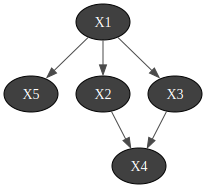

In [38]:
gnb.showBN(dag)

          X1        X2        X3        X4        X5
X1  1.000000  0.999266  0.982858 -0.997426  0.995183
X2  0.999266  1.000000  0.982060 -0.998557  0.994452
X3  0.982858  0.982060  1.000000 -0.971541  0.978830
X4 -0.997426 -0.998557 -0.971541  1.000000 -0.992430
X5  0.995183  0.994452  0.978830 -0.992430  1.000000


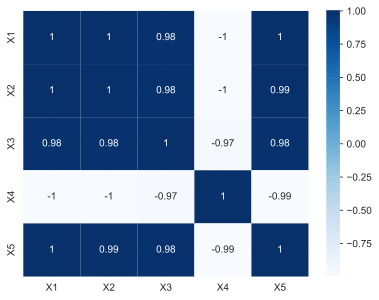

In [40]:
# generate covariance matrix
corr_mat = corr_data.corr()
print(corr_mat)

# plot correlation matrix with a blue pallet
fig, ax = plt.subplots()
sns.heatmap(corr_mat, annot=True, ax=ax, cmap="Blues")
plt.show()


In [43]:
# compute the precision matrix of data
precision_matrix = np.round(np.linalg.inv(corr_mat), 4)
precision_matrix

array([[ 8.1229290e+02, -6.9598680e+02, -2.5677400e+01, -1.0482600e+01,
        -1.0152410e+02],
       [-6.9598680e+02,  3.5267999e+03, -5.7732610e+02,  2.2643649e+03,
        -2.2710000e+00],
       [-2.5677400e+01, -5.7732610e+02,  1.4725560e+02, -4.6074000e+02,
        -1.7136000e+00],
       [-1.0482600e+01,  2.2643649e+03, -4.6074000e+02,  1.8022529e+03,
        -1.7741000e+00],
       [-1.0152410e+02, -2.2710000e+00, -1.7136000e+00, -1.7741000e+00,
         1.0421020e+02]])

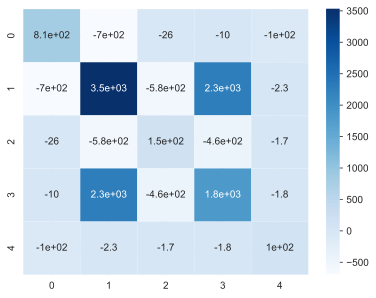

In [44]:
# visualize the precision matrix
fig, ax = plt.subplots()
sns.heatmap(precision_matrix, annot=True, ax=ax, cmap="Blues")
plt.show()
